In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Neural Networks
Neurale netwerken zijn een techniek die al ouder zijn dan onze huidige personal computers. Al in 1943 werd er door Pitts en McCullogh een neuron geproduceerd (met gebruik van electronische componenten) om een rekenkern te maken die vergelijkbaar werkte met wat er vlak daarvoor door Neuro-scientists was ontdekt over de werking van het menselijk brein [[1](#references)]. Deze techniek leek eerst erg veelbelovend, maar liep helaas al gauw tegen een aantal fundamentele problemen; problemen welke pas in de jaren 1990-2000 werden getackled door het ontdekken van *backpropagation*.

## Een kunstmatige neuron
Een biologische neuron (een hersencel dus), bestaat uit een aantal elementaire delen:
* een kern (nucleus);
* een output (axon);
* inputs (dendriten, verbonden aan de axonen van andere neuronen).
![neuron](https://d2jmvrsizmvf4x.cloudfront.net/zuQoQ13kR5uXqEQGIZmi_neuron.jpg)

Artificiele neuronen bevatten dezelfde onderdelen:
[Insert neuron image from presentation]

Een aantal kenmerken van artificiele (en deels ook biologische) neuronen:
* Nucleus is aan of uit, afhankelijk van de combinatie van gewogen inputs (d.w.z., als voldoende voorgaande neuronen "aan" zijn, dan gaat dit neuron ook "aan");
* Als een neuron aan is, dan stuurt deze signalen over zijn output, daarmee kan hij andere neuronen "aan" zetten;
* Biologische neuronen hebben maar twee toestanden: "aan" en "uit", artificiele neuronen hebben vaker een activatiewaarde tussen 0 en 1 (of tussen -1 en 1).
Om te bepalen of een neuron geactiveerd wordt (= "aan" gaat), moeten we de gewogen som van de inputs berekenen, en door de activatiefunctie halen.

Er zijn een aantal gangbare activatiefuncties:
- step-function (ook wel threshold-function genaamd), na voldoende verzadiging gaat het neuron aan, anders blijft deze uit:

$\mathit{output}= g = \left\{\begin{array}{ll}
0 & \text{if }\sum\limits_{i=1}^nw_ix_i < t\\[2.5pt]
1 & \text{if }\sum\limits_{i=1}^nw_ix_i \geq t
\end{array}\right.
$

<IPython.core.display.Javascript object>


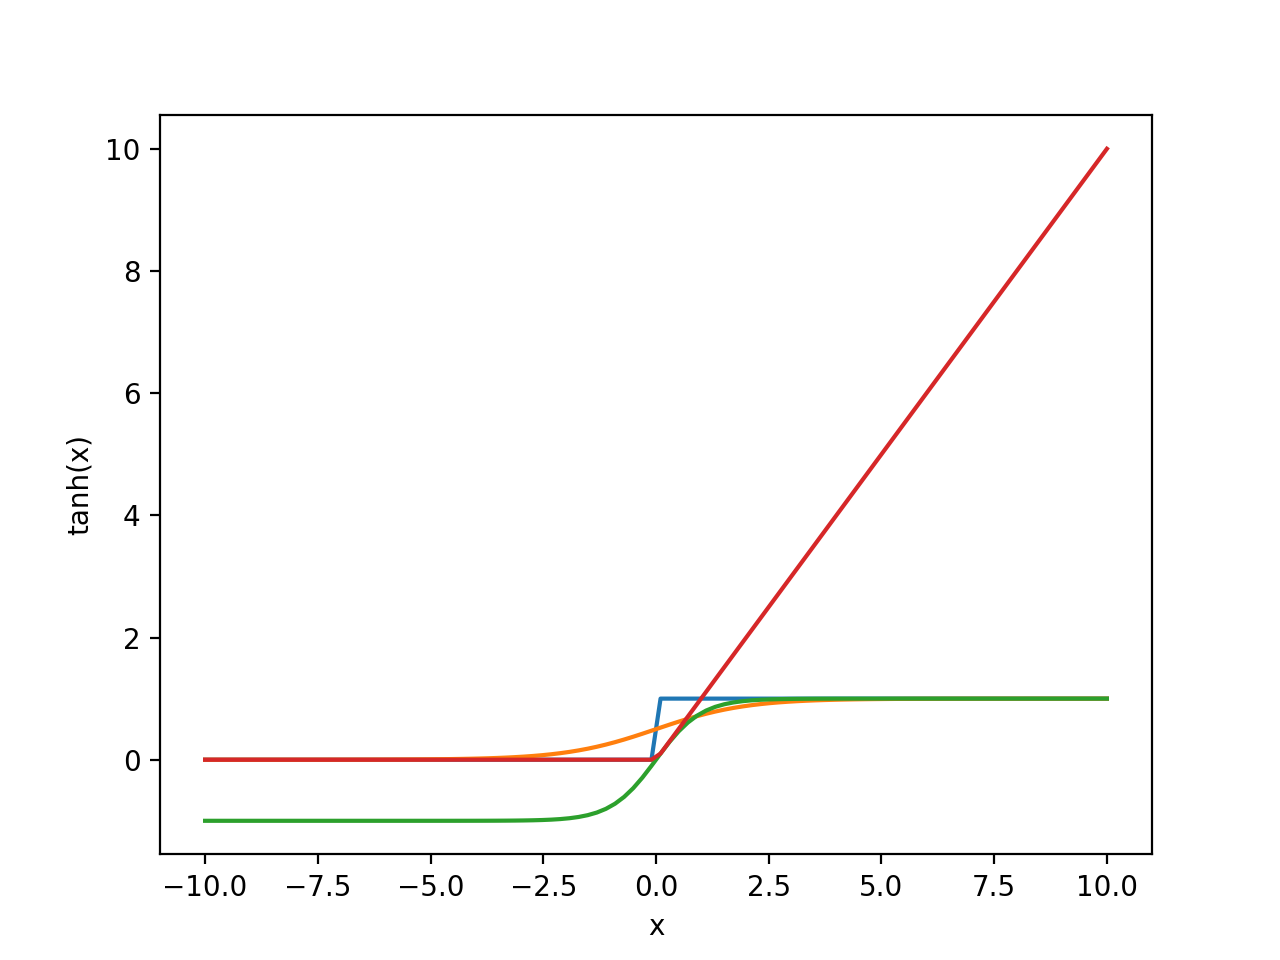

In [2]:
x = np.linspace(-10, 10, 100)
y = [0 if xi < 0 else 1 for xi in x]
plt.plot(x, y)
plt.show()

- sigmoid-function (of tanh-function), een geleidelijke functie die de input-waarde vertaald naar een continue-waarde tussen 0 en 1 (output van tanh ligt tussen -1 en 1):

$\sigma(z)=\frac{1}{(1+e^{-z})}$

In [3]:
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("sigmoid(X)") 
plt.show()

In [4]:
from math import tanh
x = np.linspace(-10, 10, 100)
z = [tanh(xi) for xi in x]
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.show()

- voor neurale netwerken die plaatjes als invoer gebruiken, wordt vandaag de dag ook vaak de ReLU (Rectified Linear Unit) activatie-functie gebruikt:

$f(z)=max(0,z)$

In [5]:
x = np.linspace(-10, 10, 100)
y = [max(0, xi) for xi in x]
plt.plot(x, y)
plt.show()

# OO-implementatie NN
In de volgende opgave gaan we een object-oriented implementatie maken van neurale netwerken. Normaliter wordt dit niet gedaan, omdat het eenvoudiger (en computationeel sneller) is om gebruik te maken van de lineaire algebra representatie van neurale netwerken, maar voor het besef van wat een neuraal netwerk is en doet, kan het wel helpen.

We maken onze implementatie aan de hand van het volgende, conceptuele ontwerp in UML.
[UML diagram invoegen]

Een deel van de implementatie is hieronder al gegeven:

In [11]:
from typing import List, TypeVar, Callable
import numpy as np
from math import tanh
o
# Typing variables, will later be overwritten by actual class implementations
Neuron = TypeVar("Neuron")
Network = TypeVar("Network")
Layer = TypeVar("Layer")

def sigmoid(x: float) -> float:
    return 1/(1 + np.exp(-x))

def step(x: float) -> float:
    return 0.0 if x < 0 else 1.0

def relu(x: float) -> float:
    return max(0.0, x)

class Neuron:
    def __init__(self, inputs: List[Neuron], weights: List[float], bias_weight: float, activation_function: Callable[[float],float]) -> None:
        self.inputs = inputs
        self.weights = weights 
        self.bias_weight = bias_weight
        pass #TODO: jouw code hier!
    
    def getOutput(self) -> float:
        output = 0 
        for i in inputs:
            output += inputs[i] * self.weights[i]
        output += output + self.bias_weight
        pass # TODO: jouw code hier!
    
    def setOutput(self) -> None:
        """Only used for setting fixed output of neurons on input layer"""
        pass # TODO: jouw code hier!

class Layer:
    def __init__(self, name: str, neurons: List[Neuron]) -> None:
        self.name = name 
        self.neurons = neurons
        pass # TODO: jouw code hier!


class Network:
    def __init__(self, topology: List[int]) -> None:
        """Builds a neural network of neurons, topology is a list of layers, with number of neurons per layer; e.g. [4,5,5,3] is a neural network with 4 inputs, 2 hidden layers (each with 5 neurons) and an output layer of 3 neurons. """
        pass # TODO: jouw code hier!
    
    def forward_pass(self, input: List[float]) -> List[float]:
        """Calculates the feedforward of the network when presented with input."""
        pass # TODO: jouw code hier!

Breidt je implementatie uit met testcases om, bijv. een AND en een XOR te kunnen modelleren.

# Training Neural Networks
Hoe groter het netwerk wordt, hoe lastiger het wordt om handmatig de gewichten van elke verbinding tussen de neuronen te bepalen. Voor bijvoorbeeld de herkenning van handgeschreven cijfers [[MNIST](http://yann.lecun.com/exdb/mnist/)], waarbij plaatjes worden gebruikt van $28\times 28$ pixels, is er al een input layer nodig van minstens 784 neuronen. Als hier enkel een output-layer van 10 aan verbonden wordt (immers, er zijn 10 verschillende cijfers mogelijk), dan zijn er al 7840 gewichten die bepaald moeten worden. Laat staan wat voor aantal gewichten je gaat krijgen als je hier een of meerdere hidden lagen gaat toevoegen!

Het bepalen van de gewichten moet dus eenvoudiger; en aangezien neurale netwerken onder Machine Learning vallen, moeten we dus op zoek naar een manier waarop de machine dat zelf kan bepalen (supervised).

## Cost function
...

Om de performance van het netwerk te meten wordt veelal gebruik gemaakt van de *Mean Squared Error* (MSE): 

$C(\vec{w})=MSE=\frac{1}{2n}\sum\limits^n_{i=1}|\vec{y}_i-\vec{a}(\vec{x}_i)|^2$

## Gradient Descent
...

Gradient Descent is een optimalisatie techniek (afkomstig uit Operations Research) die gebruik maakt van de afgeleide van de cost-functie om de sterkste daling in cost te kunnen bepalen; daarmee geeft het de richting aan van de verandering die de grootste daling in cost opleverd (wat wil zeggen, die het meest effectief tot een minimum komt).
[insert plaatje gradient descent]
Berekenen van gradient descent op locatie $\vec{w}$: 

$\nabla C=\left(\frac{\partial C}{\partial w_1},\ldots,\frac{\partial C}{\partial w_n}\right)^T$
## Delta regel
Met gebruik van gradient descent, kunnen we nu een update regel specificeren:

$\vec{w}'=\vec{w}-\Delta\vec{w}=\vec{w}-\eta\nabla C$

of gesplitst per gewicht:

$w'_i=w_i-\Delta w_i=w_i-\eta\frac{\partial C}{\partial w_i}$

Deze update regel updatet alle gewichten in een keer op basis van alle voorbeelden in onze training set. Dit is optimaal, maar niet super handig; eenvoudiger is als we na elk voorbeeld een update uitvoeren (met als risico dat we soms een stapje in de verkeerde richting doen).

De cost-functie is dan:

$C(\vec{w})=\frac{1}{2}|\vec{y}-\vec{a}(\vec{x})|^2$

En we kunnen nu de partiele afgeleide per gewicht berekenen:


\begin{eqnarray*}
\Delta w_{i,j}'&=& \eta\frac{\partial C}{\partial w_{i,j}}\\
&=& \eta\frac{\partial(\frac{1}{2}|\vec{y}-\vec{a}(\vec{x})|^2)}{\partial w_{i,j}}\\
&=&-\eta\; a_{i}\;g'(in_j)(y_k-a_j)
\end{eqnarray*}

Hieruit volgt de *Delta regel* voor het updaten van een-laags netwerken waarbij elke input een directe link heeft met de output:

$w'_{j,k}=w_{j,k}-\Delta w_{j,k}=w_{j,k} + \eta\; a_j \;g'(in_k)(y_k-a_k)$

Breidt je eerdere Neuron-class uit met een implementatie van de Delta Regel om de gewichten van, bijv. een AND- of OR-netwerk automatisch te trainen

In [7]:
class DeltaNeuron(Neuron):
    def __init__(self, inputs: List[Neuron], weights: List[float], bias_weight: float, activation_function: Callable[[float],float]) -> None:
        Neuron.__init__(self, inputs, weights, bias_weight, activation_function)
    
    # TODO Delta regel toevoegen

# Backpropagation
Een probleem van de Delta Regel, hoe effectief die ook is, is dat ze beperkt is tot netwerken met maar een laag. Voor netwerken met hidden lagen is er geen directe verbinding tussen de output neuronen en de input neuronen, en is het gebruik van de Delta Regel niet mogelijk.

Om dit op te lossen, dienen we de Delta Regel aan te passen; we herschrijven onze update regel om aan te geven wat een error is:

$\Delta_k=g'(in_k)(y_k-a_k)$

De update regel wordt dan:

$w_{j,k}=w'_{j,k}+\eta a_j\Delta_k$

De error $\Delta_k$ hierboven geeft aan wat de fout is die wordt gemeten bij een output-neuron. Voor hidden neuronen zullen we de fout moeten terug propageren (back propagate) om hun aandeel in die fout te kunnen bepalen. We definieren de fout van een hidden neuron alsvolgt:

$\Delta_j=g'(in_j)\sum\limits_p w_{j,p}\Delta_p$

Deze combinatie van update regel, en de fout van output-neuronen of van hidden neuronen geeft ons het *Backpropagation* leer mechanisme.

Breidt nu je Neuron class uit met *backpropagation* om ook netwerken met hidden lagen te kunnen trainen. Naast de implementatie van een XOR, is de [Iris-dataset](https://www.kaggle.com/uciml/iris) een geschikt probleem om backpropagation op te testen (gebruik een 4-5-5-3 netwerk).

In [8]:
class BackPropNeuron(Neuron):
    def __init__(self, inputs: List[Neuron], weights: List[float], bias_weight: float, activation_function: Callable[[float],float]) -> None:
        Neuron.__init__(self, inputs, weights, bias_weight, activation_function)
    
    # TODO: add backpropagation
    

# References<a id="references">
[1] Aldewereld, H., van der Bijl, B., Bunk, J. (2017) Applied Artificial Intelligence. (Gedistribueerd onder de CC BY-NC-SA 4.0 licentie.)
